# Import Library

In [268]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import re
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import Dataset

In [247]:
path = "C:/Users/julia/Downloads/ccrescentus(1).fa"
f= open(path, 'r')
p = f.readlines()
f.close()
gene = ''
for line in p[1:]:
  gene = gene + line.strip()
gene  

'gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagataggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttccagtcgtcgaagctggg

## Find the smallest element in gene

In [248]:
g = list(set(gene))

## Find all possible combination of element

In [249]:
import itertools
worddict = {}
for n_gene in range(1,5):
  p = itertools.product(g, repeat = n_gene)
  h = []
  for word in p:
    s = ''
    for t in word:
      s = s+t
    h.append(s)
  worddict[n_gene] = h
worddict[3]

['ccc',
 'cca',
 'ccg',
 'cct',
 'cac',
 'caa',
 'cag',
 'cat',
 'cgc',
 'cga',
 'cgg',
 'cgt',
 'ctc',
 'cta',
 'ctg',
 'ctt',
 'acc',
 'aca',
 'acg',
 'act',
 'aac',
 'aaa',
 'aag',
 'aat',
 'agc',
 'aga',
 'agg',
 'agt',
 'atc',
 'ata',
 'atg',
 'att',
 'gcc',
 'gca',
 'gcg',
 'gct',
 'gac',
 'gaa',
 'gag',
 'gat',
 'ggc',
 'gga',
 'ggg',
 'ggt',
 'gtc',
 'gta',
 'gtg',
 'gtt',
 'tcc',
 'tca',
 'tcg',
 'tct',
 'tac',
 'taa',
 'tag',
 'tat',
 'tgc',
 'tga',
 'tgg',
 'tgt',
 'ttc',
 'tta',
 'ttg',
 'ttt']

## Cut all the DNA into equal sizes 300

In [250]:
n = len(gene)// 300
DNA = []

for i in range(n):
  if (i +1)* 300 < len(gene):
    DNA.append(gene[i* 300: (i+1)*300])
  else:
    DNA.append(gene[i*300:])
DNA

['gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgaggg',
 'cgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata',
 'ggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggt',
 'cttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttcc

## Set new dataset for DNA

In [262]:
# search DNA[0] and find the number of gene chain 
worddict[3]
DNA_data= {}

for i, j in enumerate(worddict[3]):
  DNA_data[j] = []
  for m in range(n):
    DNA_data[j].append(0)
    for h in range(101):
      if DNA[m][h*3: (h+1)*3] == j:
        DNA_data[j][m]= DNA_data[j][m]+1

# set dataframe for DNA_data
DNA_df= pd.DataFrame(DNA_data)
DNA_df

,ccc,cca,ccg,cct,cac,caa,cag,cat,cgc,cga,...,tag,tat,tgc,tga,tgg,tgt,ttc,tta,ttg,ttt
0,1,4,4,1,2,0,5,0,2,1,...,0,0,0,1,2,0,0,0,1,1
1,1,1,1,0,4,0,5,0,4,5,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,5,0,8,0,4,2,...,0,0,1,0,0,0,0,0,1,0
3,0,2,0,0,3,0,7,0,4,2,...,0,0,1,0,1,0,0,0,0,0
4,0,5,1,0,2,1,7,0,2,2,...,0,0,0,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1,1,4,0,1,0,1,0,3,1,...,2,0,0,1,5,0,2,0,9,0
1013,2,2,4,0,1,1,3,0,2,0,...,0,0,1,1,2,1,1,0,7,0
1014,1,0,2,0,0,2,0,0,0,2,...,0,1,0,0,0,0,3,0,8,0
1015,0,0,2,3,2,1,2,3,5,0,...,1,0,2,1,2,0,2,0,2,2


## Standardize the Dataset

In [264]:
DNA_df1 = DNA_df.copy()
DNA_df1 = DNA_df1.astype('float')

std = StandardScaler()
DNA_df1.loc[:,:]= std.fit_transform(DNA_df1)
DNA_df1

,ccc,cca,ccg,cct,cac,caa,cag,cat,cgc,cga,...,tag,tat,tgc,tga,tgg,tgt,ttc,tta,ttg,ttt
0,-0.621395,0.888572,0.145674,-0.463824,0.499828,-0.596923,1.286885,-0.698144,-0.907987,-0.694272,...,-0.434848,-0.455893,-0.850889,-0.213286,-0.126717,-0.693259,-0.794508,-0.349697,0.045674,0.780454
1,-0.621395,-0.505276,-1.055542,-0.918264,1.767473,-0.596923,1.286885,-0.698144,-0.164790,0.607848,...,-0.434848,-0.455893,-0.850889,-0.829515,-1.003393,-0.693259,-0.216115,-0.349697,-0.590639,-0.574020
2,-1.266252,-0.505276,-1.455948,-0.918264,2.401295,-0.596923,2.517696,-0.698144,-0.164790,-0.368742,...,-0.434848,-0.455893,-0.300409,-0.829515,-1.003393,-0.693259,-0.794508,-0.349697,0.045674,-0.574020
3,-1.266252,-0.040660,-1.455948,-0.918264,1.133650,-0.596923,2.107426,-0.698144,-0.164790,-0.368742,...,-0.434848,-0.455893,-0.300409,-0.829515,-0.565055,-0.693259,-0.794508,-0.349697,-0.590639,-0.574020
4,-1.266252,1.353188,-1.055542,-0.918264,0.499828,-0.020955,2.107426,-0.698144,-0.907987,-0.368742,...,-0.434848,-0.455893,-0.850889,-0.829515,-1.003393,-0.693259,-0.216115,-0.349697,1.318302,-0.574020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,-0.621395,-0.505276,0.145674,-0.918264,-0.133994,-0.596923,-0.354196,-0.698144,-0.536388,-0.694272,...,2.158937,-0.455893,-0.850889,-0.213286,1.188297,-0.693259,0.362277,-0.349697,5.136186,-0.574020
1013,0.023461,-0.040660,0.145674,-0.918264,-0.133994,-0.020955,0.466345,-0.698144,-0.907987,-1.019802,...,-0.434848,-0.455893,-0.300409,-0.213286,-0.126717,0.267292,-0.216115,-0.349697,3.863558,-0.574020
1014,-0.621395,-0.969892,-0.655137,-0.918264,-0.767816,0.555014,-0.764466,-0.698144,-1.651184,-0.368742,...,-0.434848,1.015990,-0.850889,-0.829515,-1.003393,-0.693259,0.940670,-0.349697,4.499872,-0.574020
1015,-1.266252,-0.969892,-0.655137,0.445056,0.499828,-0.020955,0.056074,1.173594,0.206809,-1.019802,...,0.862044,-0.455893,0.250071,-0.213286,-0.126717,-0.693259,0.362277,-0.349697,0.681988,2.134928


## Apply PCA

In [265]:
pca = PCA(2)
DNA_df1_pca = pca.fit_transform(DNA_df1)
DNA_df1_pca = pd.DataFrame(DNA_df1_pca, columns= ['pc1', 'pc2'])

In [266]:
pca.explained_variance_ratio_.sum()

0.3167020193818014

## Plot the distribution in 2d 

<Axes: xlabel='pc1', ylabel='pc2'>

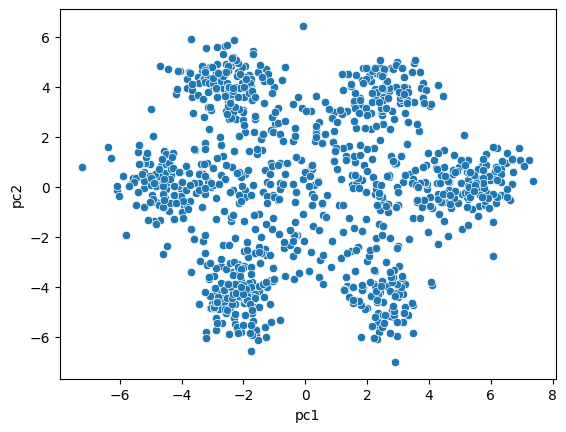

In [267]:
sns.scatterplot(data = DNA_df1_pca, x = 'pc1', y = 'pc2')

## Use k_Mean to cluster the data points

In [275]:
kmeans = KMeans(n_clusters = 7, random_state= 1)
kmeans.fit(DNA_df1_pca)

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=7, random_state=1)

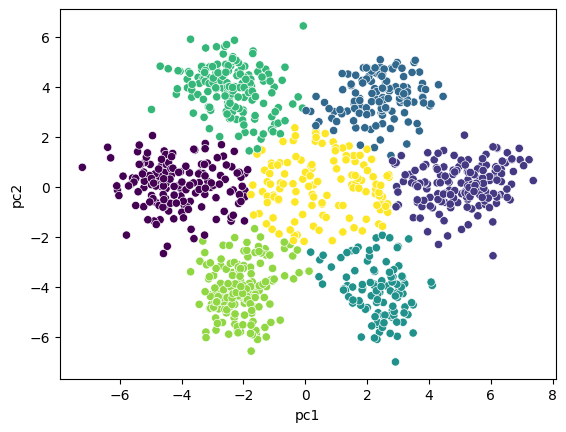

In [283]:
labels = kmeans.labels_
sns.scatterplot(data = DNA_df1_pca, x = 'pc1', y = 'pc2',c = labels)
plt.show()